# Introduction to Data Visualization in Python

Chapter 2 - Bars and Boxes
Welcome to this, the second part of our data visualization in python course. Having looked at line plots in part one we now consider histograms and box and whisker plots and some of the options for formatting these.


If you have any questions, feedback or suggestions then please feel free to contact me, colin.paterson@york.ac.uk

In [1]:
# Let us start by importing some libraries which will be need for this worksheet.


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
# In this tutorial we will start to use the pandas library. This allows us to have
# data frames which you can consider as tabular data.

# Let us start by getting the data we are going to use.

# The data is taken from some synthetic NHS data the full set is availble at
# https://data.england.nhs.uk/dataset/a-e-synthetic-data
# Please be aware the original data set is very large.

# For the purposes of this tutorial I have stored the example dataset on my
# university website and we can read it into a pandas dataframe as follows

url ='https://www-users.york.ac.uk/~cap508/resources/NHS_Sample.csv'

health_df = pd.read_csv(url)

In [3]:
# We can now look at the data and see what it looks like.
# The head function only returns the first few rows of the data.
print(health_df.head())

   Unnamed: 0  IMD_Decile_From_LSOA Age_Band  Sex       AE_Arrive_Date  \
0           0                     2    65-84    1  2015-07-02 00:00:00   
1           1                     6    18-24    1  2017-05-31 00:00:00   
2           2                     2    65-84    2  2015-10-25 00:00:00   
3           3                     4    25-44    1  2014-06-16 00:00:00   
4           4                     7    18-24    2  2017-11-18 00:00:00   

  AE_Arrive_HourOfDay  AE_Time_Mins   AE_HRG  AE_Num_Diagnoses  \
0               17-20           210     High                 1   
1               17-20            20      Low                 0   
2               13-16           280  Nothing                 1   
3               21-24           150      Low                 1   
4               13-16           180      Low                 1   

   AE_Num_Investigations  AE_Num_Treatments  AE_Arrival_Mode  \
0                      5                  3                2   
1                      1      

In [4]:
# Looking closer

print("The data frame we have created has the following shape {}, i.e. 1000 rows and 19 columns".format(health_df.shape))
print("-----")
print("Column 5 of the dataframe is called : {}".format(health_df.columns[5]))
print("-----")
print("We can look at the value in a single row by index using iloc")
print(health_df.iloc[0])
print("-----")
print("We can look at the value in a single column by")
print(health_df.iloc[0:5,2])
print("-----")

# Some range examples
# iloc[0, 3] eans row 0 column 3
# iloc[0:5, 3:6] means rows 0 - 5, and columns 3 - 6
# iloc[0:5, 3:] means rows 0 - 5, and all columns starting at column 3

The data frame we have created has the following shape (1000, 19), i.e. 1000 rows and 19 columns
-----
Column 5 of the dataframe is called : AE_Arrive_HourOfDay
-----
We can look at the value in a single row by index using iloc
Unnamed: 0                                           0
IMD_Decile_From_LSOA                                 2
Age_Band                                         65-84
Sex                                                  1
AE_Arrive_Date                     2015-07-02 00:00:00
AE_Arrive_HourOfDay                              17-20
AE_Time_Mins                                       210
AE_HRG                                            High
AE_Num_Diagnoses                                     1
AE_Num_Investigations                                5
AE_Num_Treatments                                    3
AE_Arrival_Mode                                      2
Provider_Patient_Distance_Miles                      1
ProvID                                           15207
Ad

***Plotting data***

Pandas has a number of plotting functions built in for workign with tabular data so let us start with those.

(array([ 55., 328., 256., 146.,  91.,  47.,  33.,  12.,   5.,  27.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

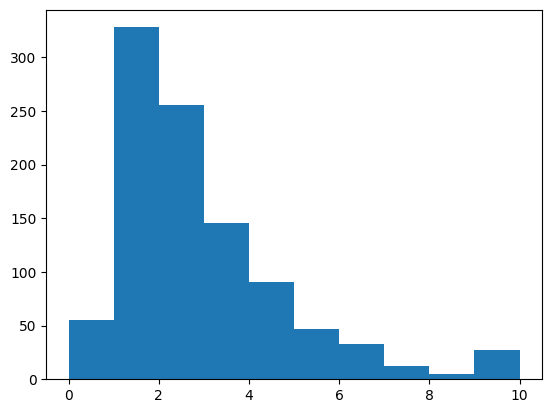

In [5]:
# Let us choose one column from the data set and create a Histogram
# Here is the simplest command possible
plt.hist(health_df['AE_Num_Treatments'])


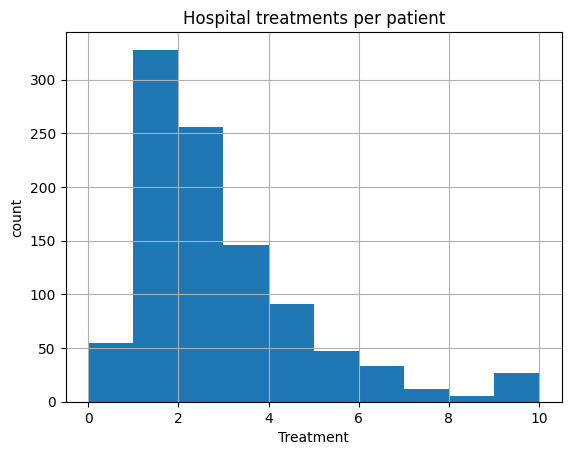

In [6]:
# But if we want to make this similar to our line plotting work ...
fig,ax = plt.subplots()
ax.hist(health_df['AE_Num_Treatments'])
ax.set(xlabel='Treatment', ylabel='count', title='Hospital treatments per patient')
ax.grid()


<font color='red'>Now you try.</font> See if you can create a plot with green rather than blue bars for column 'AE_Num_Investigations'.

In [7]:
# Insert your code into this cell.

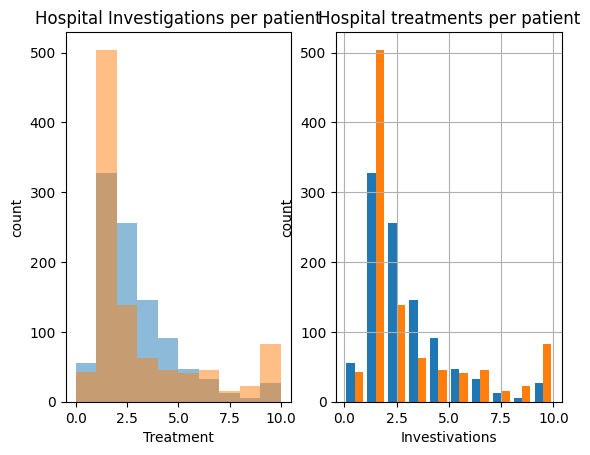

In [8]:
# OK but what if we have two sets of data for one plot then we have a couple of ways of doing this.

# start by setting up two subplot
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

#In the first plot simply overlay them. Note the alpha command makes the bars transparent.
ax1.hist(health_df['AE_Num_Treatments'], alpha=0.5)
ax1.hist(health_df['AE_Num_Investigations'], alpha=0.5)
ax1.set(xlabel='Treatment', ylabel='count', title='Hospital Investigations per patient')

# In the second we plot them side by side. Note that the notation [x, y] means a 'Matrix'
# structure with two columns. In this way column 1 holds the data in x and column 2 holds
# the data in y
ax2.hist([health_df['AE_Num_Treatments'], health_df['AE_Num_Investigations']])
ax2.set(xlabel='Investivations', ylabel='count', title='Hospital treatments per patient')
ax2.grid()

<font color='red'>Now you try.</font> based on what you have learned so far

1. play with the values of alpha to see what they do
2. Change the colors of the bars
3. Try adding the edgecolor option to the plot
4. Try adding histstyle='stepfilled' to a plot

In [9]:
# Insert your code here.

# Now we will create some Box Plots

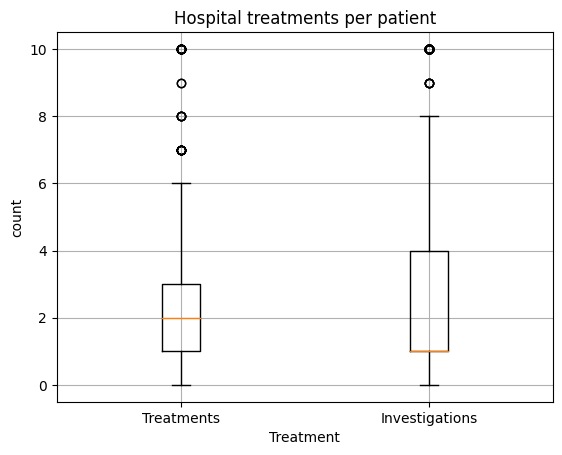

In [10]:
fig,ax = plt.subplots()
ax.boxplot([health_df['AE_Num_Treatments'],health_df['AE_Num_Investigations']])
ax.set(xlabel='Treatment', ylabel='count', title='Hospital treatments per patient')
ax.set_xticklabels(['Treatments', 'Investigations'])
ax.grid()


Unfortunately controlling the look of these plots can be quite tricky. Here is some code based on a question in stack overflow which creates a function to control how they look. Play with the code to see how you can change the look of the data.

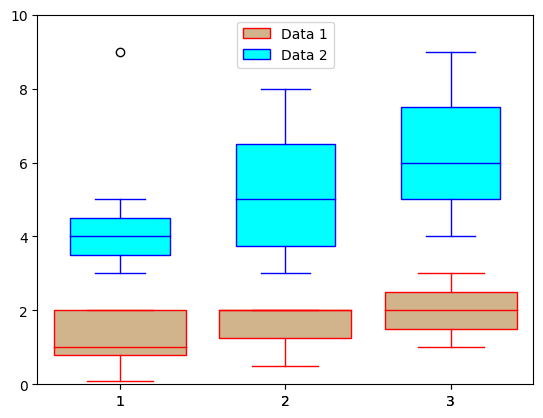

In [11]:
def box_plot(data, edge_color, fill_color, width):
    bp = ax.boxplot(data, patch_artist=True, widths=width)

    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)

    return bp

example_data1 = [[1,2,0.8,0.1,9], [0.5,2,2], [3,2,1]]
example_data2 = [[5,3, 4], [6,4,3,8], [6,4,9]]

fig, ax = plt.subplots()
bp1 = box_plot(example_data1, 'red', 'tan', 0.8)
bp2 = box_plot(example_data2, 'blue', 'cyan',0.6)
ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['Data 1', 'Data 2'])
ax.set_ylim(0, 10)
plt.show()